In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras

#https://www.youtube.com/watch?v=iqQgED9vV7k&ab_channel=codebasics
#https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

In [50]:
#load dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #train-test 0.75-0.25 split

In [51]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [52]:
#print x_train
# 28X28 grid

print(x_train[1].shape)
print("\n")
print(x_train[1])

(28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252

5


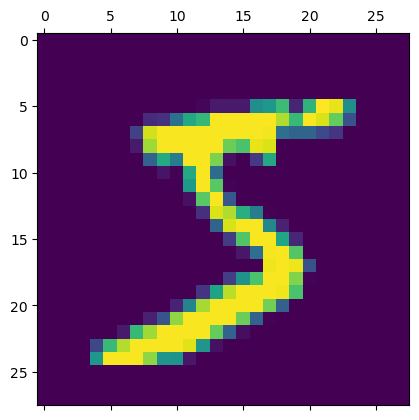

In [5]:
#plot image 

plt.matshow(x_train[0])

#print y_train

print(y_train[0])

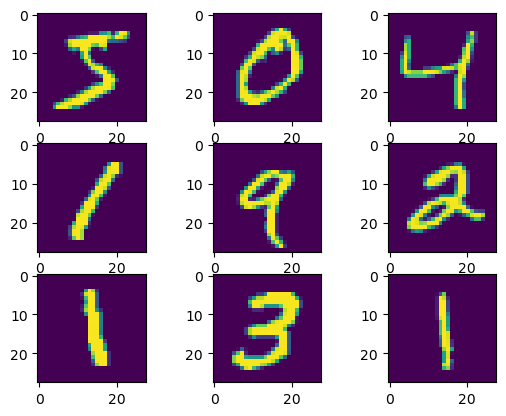

In [12]:
# plot first few images

for i in range(9):
    
    # define subplot with 3 rows and 3 columns, index from 1 to 9
    plt.subplot(3,3,i+1)
    
    # plot pixel data
    plt.imshow(x_train[i])
    
# show the figure
plt.show()

In [15]:
#normalize data by scaling

x_train = x_train / 255
x_test = x_test / 255

In [19]:
#flatten x grids into longitutdal input

image_vector_size = 28*28

x_train = x_train.reshape(len(x_train), image_vector_size)
x_test = x_test.reshape(len(x_test), image_vector_size)

print(x_train[0])

60000
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.   

In [23]:
# Define Neural Network model architecture

# Sequential groups a linear stack of layers into a tf.keras.Model
# Sequential Documentation: https://keras.io/models/sequential/
# Dense layers are "fully connected" layers

#define dense sequential neural network with 784 inputs, 10 outputs 
# one hidden layer with 32 neurons and sigmoid activation function

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = keras.Sequential()
model.add(keras.layers.Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
model.summary()

'''
The resulting architecture has 25,450 tunable parameters. 
From the input layer to the hidden layer there are 784*32 = 25,088 weights. 
The hidden layer has 32 nodes so there are 32 biases. This brings us to 25,088 + 32 = 25,120 parameters.

From the hidden layer to the output layer there are 32*10 = 320 weights.
Each of the ten nodes adds a single bias bringing us to 25,120 + 320 + 10 = 25,450 total parameters.
'''

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [29]:
#compile and train the neural network model

#Sparse_categorial_entropy is used as there are multiple labels provided as integers.

model.compile(optimizer="sgd", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6200 - accuracy: 0.6672
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8683 - accuracy: 0.8277
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6223 - accuracy: 0.8649
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5131 - accuracy: 0.8791
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4520 - accuracy: 0.8879
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4128 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3853 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3647 - accuracy: 0.9023
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3484 - accuracy: 0.9054
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.335

In [39]:
#track history of training the model

history= model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=.1)


Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2528 - accuracy: 0.9284 - val_loss: 0.2008 - val_accuracy: 0.9472
Epoch 2/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2520 - accuracy: 0.9285 - val_loss: 0.2002 - val_accuracy: 0.9475
Epoch 3/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2511 - accuracy: 0.9286 - val_loss: 0.1997 - val_accuracy: 0.9477
Epoch 4/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2503 - accuracy: 0.9289 - val_loss: 0.1990 - val_accuracy: 0.9478
Epoch 5/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2495 - accuracy: 0.9291 - val_loss: 0.1984 - val_accuracy: 0.9478


In [41]:
#Evaluate Model on test data
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2384 - accuracy: 0.9325


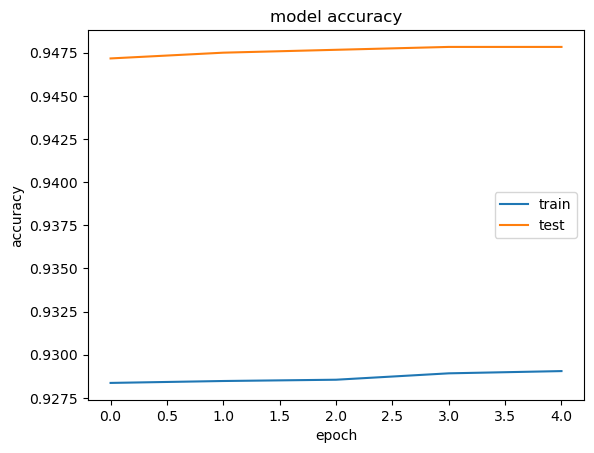

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

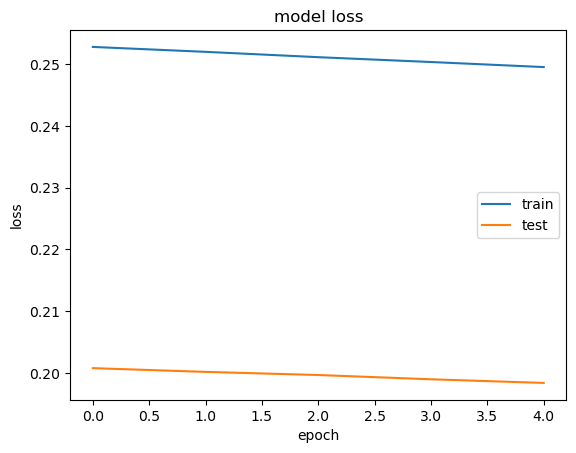

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [44]:
#predictions

y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


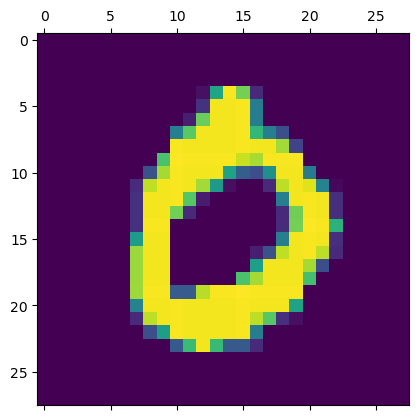

In [56]:
#lets predict the first data on test set

plt.matshow(x_test[0])

In [57]:
#print the predictions for the first data on test set

y_pred[0]

array([9.9607950e-01, 2.2170652e-06, 1.1143370e-03, 5.3117372e-04,
       4.0224736e-06, 7.8030583e-04, 6.6184613e-04, 6.0719613e-04,
       6.5386055e-05, 1.5403455e-04], dtype=float32)

In [60]:
#argmax function finds the argument that gives the maximum value from a target function.

np.argmax(y_pred[0])

7

In [61]:
#confusion matrix

y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    3,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    1,    1,    4,    2,   13,    0],
       [  12,    4,  942,   10,   11,    1,   11,   10,   26,    5],
       [   2,    1,   13,  939,    0,   19,    3,   11,   18,    4],
       [   1,    3,    3,    0,  921,    0,   11,    2,    6,   35],
       [   8,    3,    2,   43,    6,  787,   16,    4,   15,    8],
       [  13,    3,    3,    1,    9,   12,  913,    2,    2,    0],
       [   3,    9,   26,    5,    4,    0,    0,  953,    2,   26],
       [   7,    8,    4,   19,    8,   20,   10,   11,  882,    5],
       [  11,    7,    1,   11,   34,    6,    1,   15,    7,  916]])>

Text(95.72222222222221, 0.5, 'Truth')

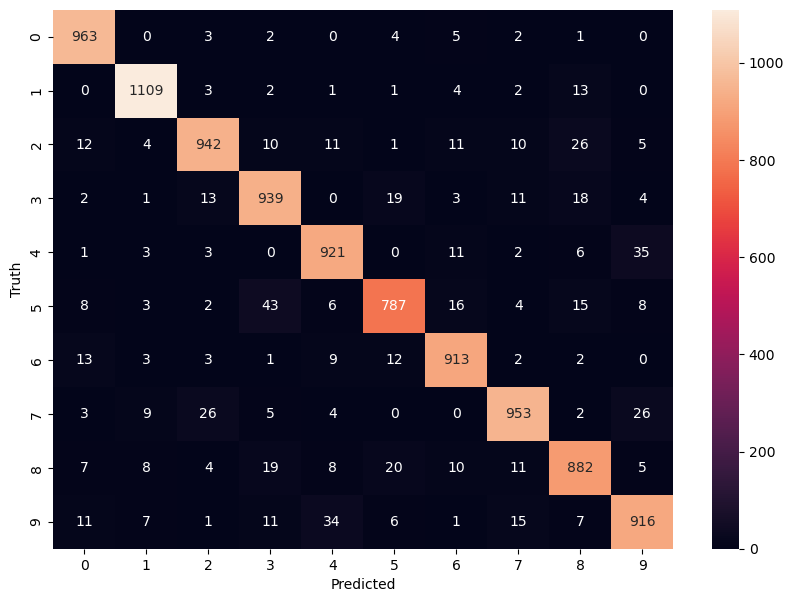

In [62]:
#plot confusion matrix with seaborn heatmap

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')